In [6]:
import tensorflow as tf
from keras.layers import Dense,Input,concatenate
from keras import Model
from keras.utils import plot_model
from keras.layers import BatchNormalization,Conv2D

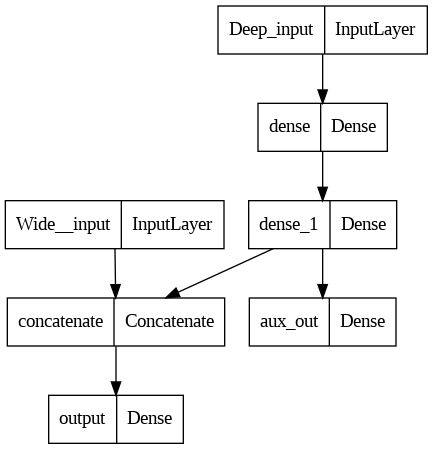

In [2]:
inp_a = Input(shape=[1],name="Wide__input")
inp_b = Input(shape=[1],name="Deep_input")

hidden_1 = Dense(30 ,activation="relu")(inp_b)
hidden_2 = Dense(30,activation="relu")(hidden_1)

concat = concatenate([inp_a,hidden_2])
output = Dense(1,name="output") (concat)

aux_out = Dense(1,name="aux_out")(hidden_2)

model = Model(inputs=[inp_a,inp_b],outputs=[output,aux_out])

plot_model(model)

# Using A Class

In [3]:
class WideAndDeep(Model):

  def __init__(self,units=30,input_dim=1,activation="relu",**kwargs):
    super().__init__(**kwargs)
    self.input_layer =Input(shape=(input_dim,))
    self.hidden_1 = Dense(units,activation=activation)
    self.hidden_2 = Dense(units,activation=activation)
    self.aux_out = Dense(1)
    self.out=Dense(1)


  def call(self,inputs):
    inp_a,inp_b = self.input_layer(inputs)
    hidden_1 = self.hidden_1(inp_b)
    hidden_2 = self.hidden_2(hidden_1)
    concat = concatenate([inp_a,hidden_2])
    out = self.out(concat)
    aux_out = self.aux_out(hidden_2)
    return out,aux_out


In [4]:
model = WideAndDeep()

# **Model Subclassing**

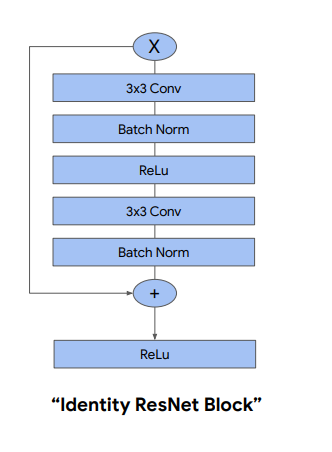

In [7]:
class identity_block(Model):
  def __init__(self,filters,kernel_size):
    super(identity_block,self).__init__()

    self.conv1= Conv2D(filters,kernel_size,padding='same')
    self.bn1 = BatchNormalization()

    self.conv2= Conv2D(filters,kernel_size,padding='same')
    self.bn2 = BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')
    self.add = tf.keras.layers.Add()


  def call(self,input_tensor):
    x = self.conv1(input_tensor)
    x= self.bn1(x)
    x= self.act(x)

    x=self.conv2(x)
    x=self.bn2(x)

    x= self.add([x,input_tensor])
    x= self.act(x)
    return x